In [1]:
import pandas as pan

In [2]:
data = pan.read_csv('searches.csv', sep='^', error_bad_lines=False)  

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (40,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head(5)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1.0,2.0,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0.0,1.0,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1.0,2.0,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0.0,1.0,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1.0,2.0,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [4]:
data.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

In [60]:
data['Month']=data['Date'].str[5:7]

In [61]:
data.head(5)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,Month
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1.0,2.0,TXL,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA,01
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0.0,1.0,ATH,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV,01
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1.0,2.0,ICT,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC,01
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0.0,1.0,RNB,...,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO,01
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1.0,2.0,OSL,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL,01


In [62]:
dest_tab = pan.DataFrame(data, columns=['Destination','Month'])

In [63]:
dest_tab['Count']= 1

In [64]:
dest_tab.head(5)

,Destination,Month,Count
0,AUH,01,1
1,MIL,01,1
2,SFO,01,1
3,ARN,01,1
4,MAD,01,1


In [90]:
f_tab_mad=dest_tab[dest_tab['Destination']=='MAD']
f_tab_bcn=dest_tab[dest_tab['Destination']=='BCN']
f_tab_mlg=dest_tab[dest_tab['Destination']=='AGP']

In [91]:
f_tab_mad.shape

(269143, 3)

In [92]:
f_tab_bcn.shape

(310062, 3)

In [93]:
f_tab_mlg.shape

(97177, 3)

In [114]:
f_tab=pan.concat([f_tab_mad, f_tab_bcn,f_tab_mlg])

In [115]:
f_tab.shape

(676382, 3)

In [116]:
f_tab.head(12)

,Destination,Month,Count
4,MAD,01,1
151,MAD,01,1
375,MAD,01,1
406,MAD,01,1
509,MAD,01,1
606,MAD,01,1
688,MAD,01,1
791,MAD,01,1
798,MAD,01,1
895,MAD,01,1


In [117]:
final_table= pan.DataFrame(f_tab.groupby(['Destination','Month']).sum())

In [74]:
final_table

Count
Destination Month       
AGP         01      9633
            02      8379
            03     10659
            04      8265
            05     10830
            06      7923
            07      8892
            08      7866
            09      8151
            10      6499
            11      6384
            12      3696
BCN         01     29469
            02     28329
            03     30552
            04     31236
            05     28728
            06     26505
            07     29241
            08     27075
            09     23427
            10     20276
            11     19824
            12     15400
MAD         01     24258
            02     22800
            03     24681
            04     25251
            05     26334
            06     22800
            07     22971
            08     21831
            09     21147
            10     22294
            11     20272
            12     14504

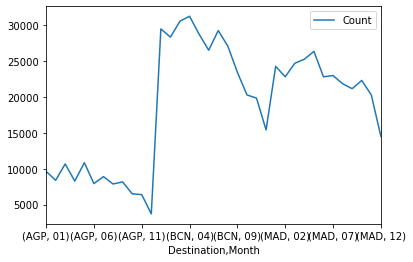

In [118]:
f_tab.set_index('Month', inplace=True)
final_table.plot(legend=True)